Import required libreries:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split


In [2]:
column_list = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income', 'median_house_value', 'ocean_proximity']
df = pd.read_csv("../data/2022w3.csv", usecols=column_list)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Convert all date into lowercase**

In [3]:
# Prepare Dataset
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

**Prepare Dataset**

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Fill Missing Values
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

In [7]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

**Question 1**<br>
What is the most frequent observation (mode) for the column ocean_proximity?<br>
**Answer is : `<1h_ocean`**

In [8]:
df['ocean_proximity'].mode()

0    <1h_ocean
Name: ocean_proximity, dtype: object

In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: count, dtype: int64

In [10]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [11]:
col_list_total = df.columns
col_list_numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 
                      'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
col_list_cat = ['ocean_proximity']


In [12]:
# Numerical correlation
df[col_list_numerical].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.027540,0.081205,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,0.106389,-0.098619,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,-0.153277,0.135622,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.133798,-0.187381,-0.024581
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.001765,0.071649,-0.028325
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.072213,0.010035,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,-0.080598,0.034498,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.326895,-0.545298,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,1.000000,-0.370308,-0.004852
bedrooms_per_room,0.081205,-0.098619,0.135622,-0.187381,0.071649,0.010035,0.034498,-0.545298,-0.370308,1.000000,0.002601


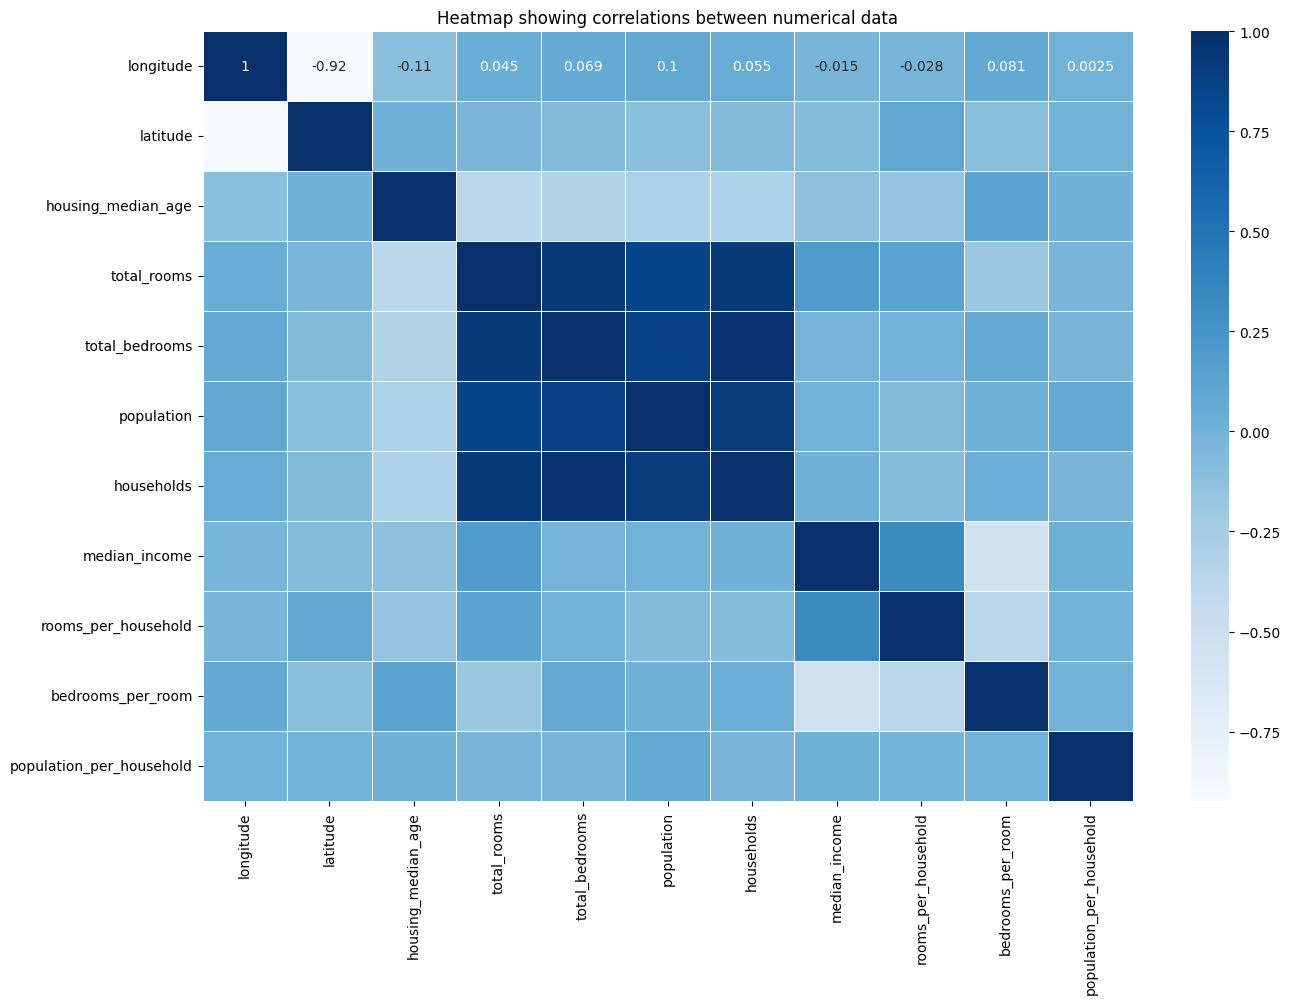

In [13]:
# Ploat numerical correlation data using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df[col_list_numerical].corr(), annot=True, linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

**Question 2**<br>
- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?<br>


**Answer is: `total_bedrooms and households`**

In [14]:
# Correlation between numerical features:
df[col_list_numerical].corr().unstack().sort_values(ascending = False)[:15]

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_income             median_income               1.000000
households                households                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population                population                  1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.974366
households                total_bedrooms              0.974366
total_bedrooms            total_rooms                 0.927058
total_rooms               total_bedrooms              0.927058
dtype: float64

**Make median_house_value binary**
- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.<br>

**Split the data**<br>
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [15]:
# Make median_house_value binary
data_class = df.copy()
mean = data_class['median_house_value'].mean()

data_class['above_average'] = np.where(data_class['median_house_value']>=mean,1,0)

In [16]:
data_class[['median_house_value', 'above_average']].head()

,median_house_value,above_average
0,452600.0,1
1,358500.0,1
2,352100.0,1
3,341300.0,1
4,342200.0,1


In [23]:
# Drop median_house_value from dataset
# data_class = data_class.drop('median_house_value', axis=1)

In [27]:
# Split the data into Train+val and Test
df_train_full , df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train , df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [30]:
print(f"train shape: {df_train.shape} Val shape: {df_val.shape} test shape: {df_test.shape}")

train shape: (12384, 14) Val shape: (4128, 14) test shape: (4128, 14)


In [31]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [32]:
print(f"train shape: {df_train.shape} Val shape: {df_val.shape} test shape: {df_test.shape}")

train shape: (12384, 13) Val shape: (4128, 13) test shape: (4128, 13)


**Question 3**
- Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
- Round it to 2 decimals using `round(score, 2)`
- What is their mutual information score?

**Answer is : `0.10`**

In [33]:
# category feature
cat = ['ocean_proximity']

# Define function to calculate mutual information using scikit learn

def calculate_mi(series):
    return mutual_info_score(series, df_train['above_average'])

# Implement on train dataset
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
np.round(df_mi, 2)

,MI
ocean_proximity,0.1


**Question 4**
- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [46]:
def create_dict(data , col_list):
    return data[col_list].to_dict(orient="records")

In [34]:
train_dict = df_train[col_list_cat + col_list_numerical].to_dict(orient="records")
val_dict = df_val[col_list_cat + col_list_numerical].to_dict(orient="records")

In [35]:
dv = DictVectorizer(sparse=False)

In [36]:
dv.fit(train_dict) # fit the dictvectorizer
# dv.get_feature_names_out()# to get the list of all features
X_train = dv.transform(train_dict) # create train data set from dictvectorizer
# X_train = dv.fit_transform(dicts)

In [37]:
X_val = dv.transform(val_dict)

In [44]:
# create model instance
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [45]:
# train model created in previous step
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [47]:
# get predictions on validation data
y_val_pred = model.predict(X_val)

In [48]:
acc = np.round(accuracy_score(y_val, y_val_pred), 2)
acc

0.05

**Question 5**
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?

In [50]:
features = col_list_numerical + col_list_cat

In [52]:
orig_score = acc

for col_head in features:
    subset = features.copy()
    subset.remove(col_head)

    train_dict = create_dict(df_train, subset)
    val_dict = create_dict(df_val, subset)

    dv = DictVectorizer(sparse=False)

    dv.fit(train_dict)

    X_train = dv.transform(train_dict)
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score= accuracy_score(y_val, y_pred)

    print(f"column Heading : {col_head}, Orig score - Score : {orig_score - score} , Score : {score}")

    

column Heading : longitude, Orig score - Score : -0.0011143410852713156 , Score : 0.05111434108527132
column Heading : latitude, Orig score - Score : -0.0015988372093023243 , Score : 0.05159883720930233
column Heading : housing_median_age, Orig score - Score : -0.003052325581395343 , Score : 0.053052325581395346
column Heading : total_rooms, Orig score - Score : -0.002083333333333333 , Score : 0.052083333333333336
column Heading : total_bedrooms, Orig score - Score : -0.0032945736434108475 , Score : 0.05329457364341085
column Heading : population, Orig score - Score : -0.003052325581395343 , Score : 0.053052325581395346
column Heading : households, Orig score - Score : -0.0032945736434108475 , Score : 0.05329457364341085
column Heading : median_income, Orig score - Score : 0.001792635658914729 , Score : 0.048207364341085274
column Heading : rooms_per_household, Orig score - Score : -0.0018410852713178286 , Score : 0.05184108527131783
column Heading : bedrooms_per_room, Orig score - Sco

**Question 6**
- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.